# **Importing Libraries**

In [28]:
from transformers import BinaryEncoder, MultiColumnLabelEncoder, MileageScaler, ColumnDropper

In [29]:
import random
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import Ridge
import random
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV


# **Reading Data**

In [30]:
# read CSV file into a DataFrame
df = pd.read_csv('car_data.csv')

In [31]:
num_attributes = df.shape[1]
print("number of attributes",num_attributes)

number of attributes 10


In [32]:
attribute_names = df.columns.tolist()
print("Name of Attributes",attribute_names)

Name of Attributes ['Make', 'Model', 'Version', 'Price', 'Make_Year', 'CC', 'Assembly', 'Mileage', 'Registered City', 'Transmission']


In [33]:
print(df.info()) # display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80572 entries, 0 to 80571
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Make             80572 non-null  object
 1   Model            80572 non-null  object
 2   Version          73800 non-null  object
 3   Price            80572 non-null  object
 4   Make_Year        80572 non-null  int64 
 5   CC               80572 non-null  int64 
 6   Assembly         80572 non-null  object
 7   Mileage          80572 non-null  int64 
 8   Registered City  80572 non-null  object
 9   Transmission     80572 non-null  object
dtypes: int64(3), object(7)
memory usage: 6.1+ MB
None


In [34]:
df.head(5)

Make    Model                          Version      Price  Make_Year  \
0       Honda  Insight                              NaN  7400000.0       2019   
1  Mitsubishi   Minica                     Black Minica  1065000.0       2019   
2        Audi       A6  1.8 TFSI Business Class Edition  9300000.0       2015   
3      Toyota     Aqua                                G  2375000.0       2014   
4       Honda     City                       1.3 i-VTEC  2600000.0       2017   

     CC  Assembly  Mileage Registered City Transmission  
0  1500  Imported     2000   Un-Registered    Automatic  
1   660  Imported    68000          Lahore    Automatic  
2  1800     Local    70000          Lahore    Automatic  
3  1500  Imported    99900       Islamabad    Automatic  
4  1300     Local    55000       Islamabad       Manual

In [35]:
# number of rows
num_rows = df.shape[0]

# print the number of rows
print("Number of rows: ", num_rows)

Number of rows:  80572


In [36]:
df.describe()

Make_Year            CC        Mileage
count  80572.000000  80572.000000   80572.000000
mean    2011.724209   1404.083267   85653.660080
std        6.953399    684.458171   82241.870901
min     1990.000000      1.000000       1.000000
25%     2007.000000   1000.000000   36500.000000
50%     2013.000000   1300.000000   73000.000000
75%     2017.000000   1600.000000  110520.000000
max     2021.000000  10000.000000  999999.000000

# **Visualization**

Mileage

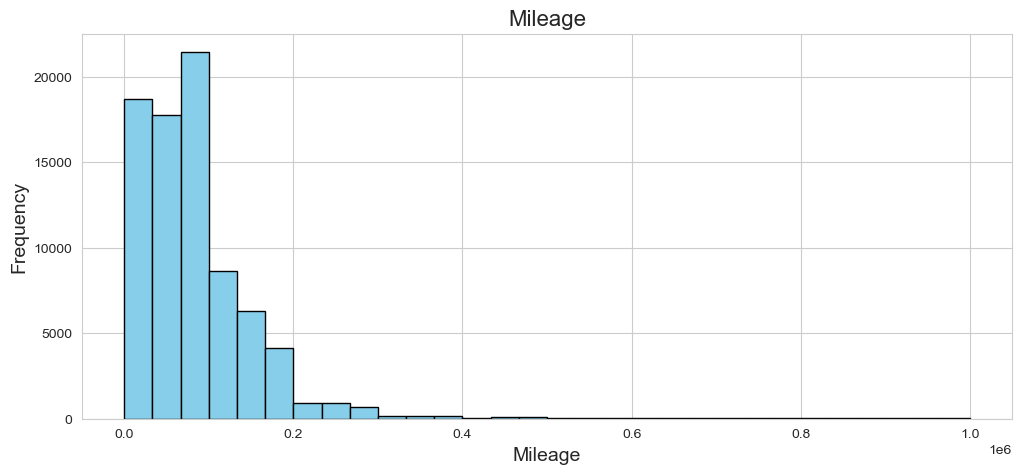

In [37]:
#Mileage
plt.figure(figsize=(12, 5))
plt.hist(df['Mileage'], bins=30, color='skyblue', edgecolor='black')
plt.title('Mileage', fontsize=16)
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

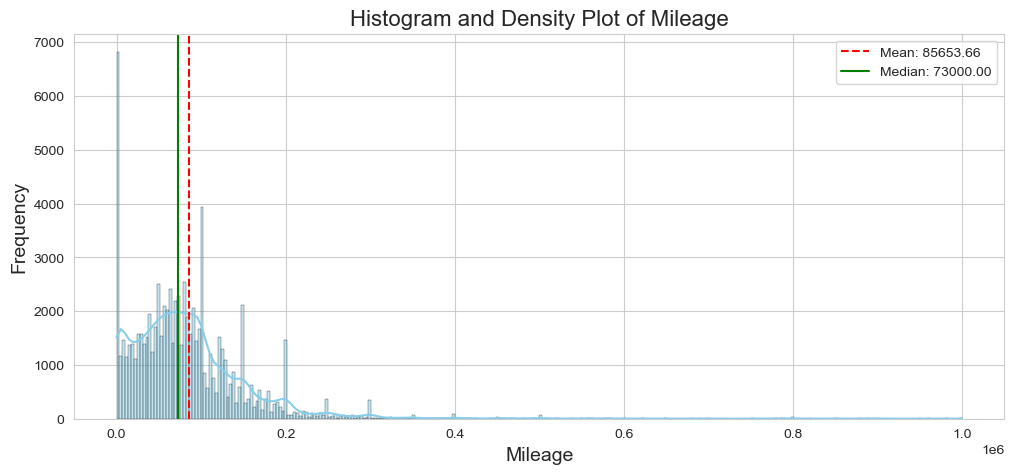

In [38]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Histogram and Density Plot for Mileage
plt.figure(figsize=(12, 5))
sns.histplot(df['Mileage'], kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram and Density Plot of Mileage', fontsize=16)
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(x=df['Mileage'].mean(), color='red', linestyle='--', label=f"Mean: {df['Mileage'].mean():.2f}")
plt.axvline(x=df['Mileage'].median(), color='green', linestyle='-', label=f"Median: {df['Mileage'].median():.2f}")
plt.legend()
plt.show()

Price

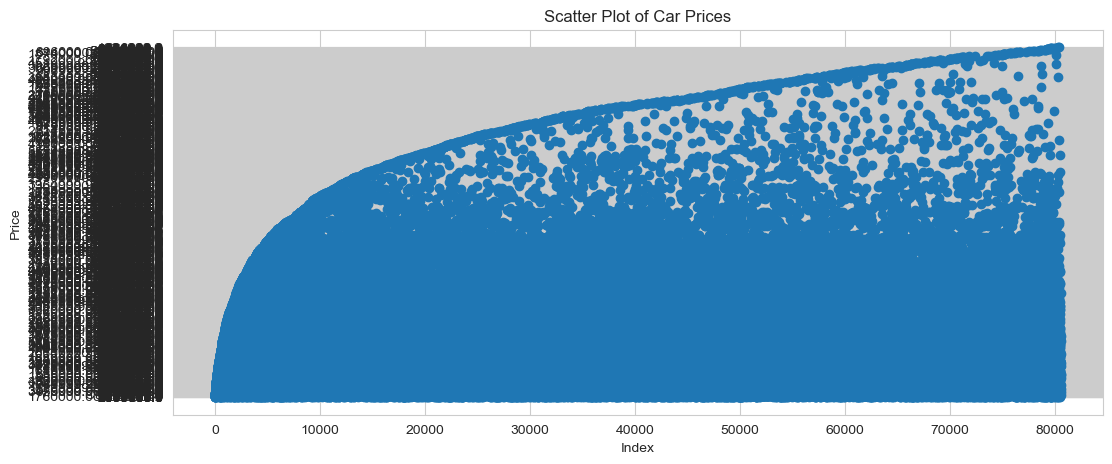

In [39]:
#Scatter Plot od Price Colunm
plt.figure(figsize=(12,5))
plt.scatter(df.index, df['Price'])
plt.title('Scatter Plot of Car Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

# **Analyzing**

Understanding  in Skewness and Kurtosis
 Before proceeding with imputation, it's crucial to understand why skewness and kurtosis might be NaN:
 1. Skewness and Kurtosis calculations return NaN if the data does not vary, i.e., all values are the same or if the data is all NaN.
 2. Ensuring that the 'Price' column has variability and not all values are identical or missing is important after preprocessing.
  This understanding guides the choice and effectiveness of the imputation method.

In [40]:
# Print Skewness
mileage_skewness = skew(df['Mileage'])
print(f"Skewness of Mileage: {mileage_skewness:.3f}")

Skewness of Mileage: 3.951


# **Pre-Processing**

Encoding,Feature Engineering,Min-Max Normalization



one-hot encoding since it appears to be a nominal categorical variable with a large number of unique values. One-hot encoding will create binary columns for each unique model, indicating whether a car corresponds to that model or not.
As there is no such important Rrelationship between Price and version,there are too many null values whiich cannot be imputed,there "Version" is dropped.



In [41]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('binary_encoder', BinaryEncoder(columns=['Transmission', 'Assembly'], 
                                     mappings={'Transmission': {'Manual': 0, 'Automatic': 1}, 
                                               'Assembly': {'Imported': 0, 'Local': 1}})),
    ('label_encoder', MultiColumnLabelEncoder(columns=['Registered City', 'Model', 'Make'])),
    ('mileage_scaler', MileageScaler(column='Mileage')),
    ('column_dropper', ColumnDropper(column='Version'))
])

In [42]:
# Apply the pipeline to your dataframe
df = pipeline.fit_transform(df)
# Verify the changes
df.head()

Make  Model      Price  Make_Year    CC  Assembly   Mileage  \
0    25    170  7400000.0       2019  1500         0  0.001999   
1    43    214  1065000.0       2019   660         0  0.067999   
2     1     17  9300000.0       2015  1800         1  0.069999   
3    61     32  2375000.0       2014  1500         0  0.099899   
4    25     86  2600000.0       2017  1300         1  0.054999   

   Registered City  Transmission  
0              180             1  
1               97             1  
2               97             1  
3               66             1  
4               66             0

Imputation of Median

Median vs Mean Imputation
Median Imputation is chosen over Mean Imputation for the following reasons:
1. The data is right-skewed, as indicated by the summary statistics where the mean is greater than the median.
 Median Imputation is less affected by outliers and skewed distributions, making it more robust for skewed data.
2. Mean Imputation might be influenced by extremely high prices in the dataset, leading to an imputed value
  that does not represent the central tendency of the majority of the data well.



In [43]:
# Count the number of rows with "Call for Price" in the 'Price' column
num_call_for_price = df['Price'].apply(lambda x: str(x).strip() == 'Call for price').sum()

print("Number of rows with 'Call for Price':", num_call_for_price)

Number of rows with 'Call for Price': 1209


In [44]:
# Ensure 'Price' is numeric and handle "Call for Price" as NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Calculate the median of the 'Price' column
median_price = df['Price'].median()

# Replace NaN values with the median
df['Price'] = df['Price'].fillna(median_price)

# Convert 'Price' to integer to remove trailing zeros after decimal point
df['Price'] = df['Price'].astype(int)

# Verify the changes
print(df['Price'].describe())

count    8.057200e+04
mean     2.545623e+06
std      3.668665e+06
min      1.000000e+05
25%      9.700000e+05
50%      1.725000e+06
75%      2.850000e+06
max      9.500000e+07
Name: Price, dtype: float64


# Pre-processed Data

checking a after data-Preprocessing

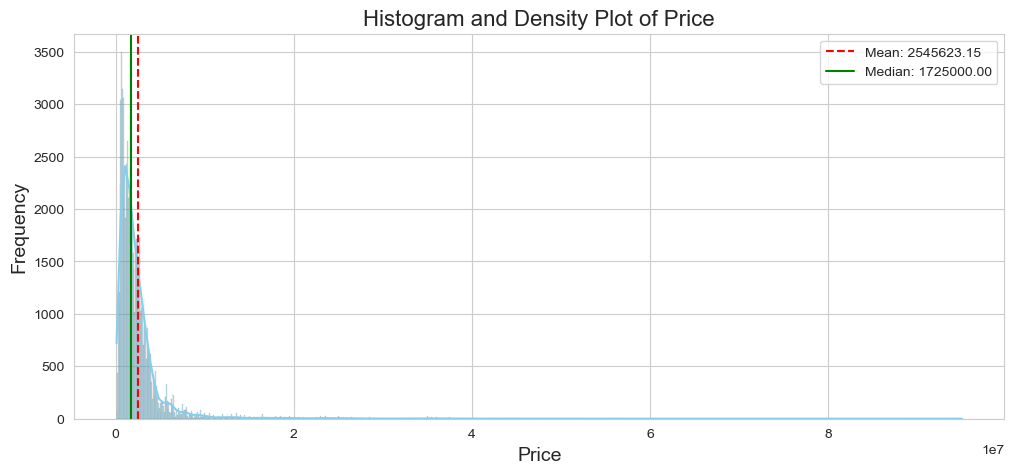

In [45]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')
# Histogram and Density Plot
plt.figure(figsize=(12, 5))
sns.histplot(df['Price'], kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram and Density Plot of Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(x=df['Price'].mean(), color='red', linestyle='--', label=f"Mean: {df['Price'].mean():.2f}")
plt.axvline(x=df['Price'].median(), color='green', linestyle='-', label=f"Median: {df['Price'].median():.2f}")
plt.legend()
plt.show()

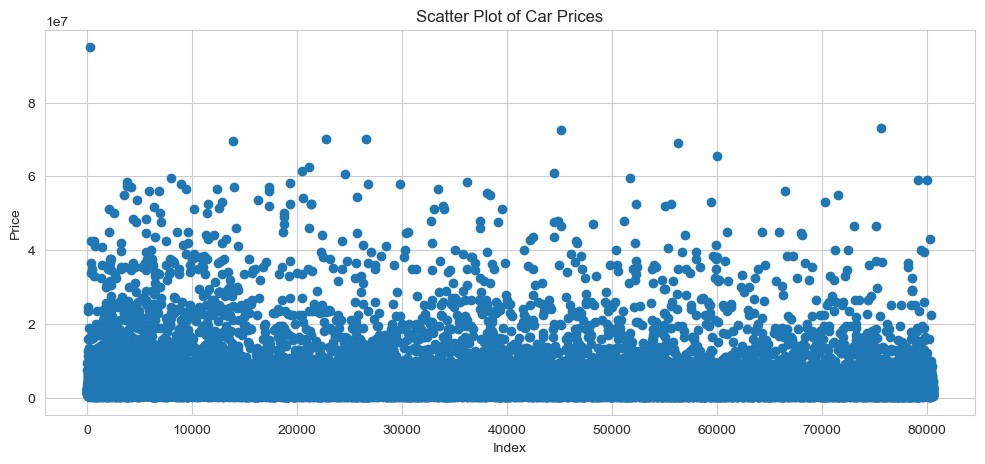

In [46]:
#Scatter Plot od Price Colunm
plt.figure(figsize=(12,5))
plt.scatter(df.index, df['Price'])
plt.title('Scatter Plot of Car Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

There is Only one outlier,it should not be remved to keep data diverse

In [47]:
# Skewness and Kurtosis
skewness = skew(df['Price'])
kurtosis_value = kurtosis(df['Price'])
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis_value}")

Skewness: 7.40352066428755
Kurtosis: 79.94109140283383


In [48]:
attribute_names = df.columns.tolist()
print("Name of Attributes",attribute_names)

Name of Attributes ['Make', 'Model', 'Price', 'Make_Year', 'CC', 'Assembly', 'Mileage', 'Registered City', 'Transmission']


In [49]:
df.head()

Make  Model    Price  Make_Year    CC  Assembly   Mileage  Registered City  \
0    25    170  7400000       2019  1500         0  0.001999              180   
1    43    214  1065000       2019   660         0  0.067999               97   
2     1     17  9300000       2015  1800         1  0.069999               97   
3    61     32  2375000       2014  1500         0  0.099899               66   
4    25     86  2600000       2017  1300         1  0.054999               66   

   Transmission  
0             1  
1             1  
2             1  
3             1  
4             0

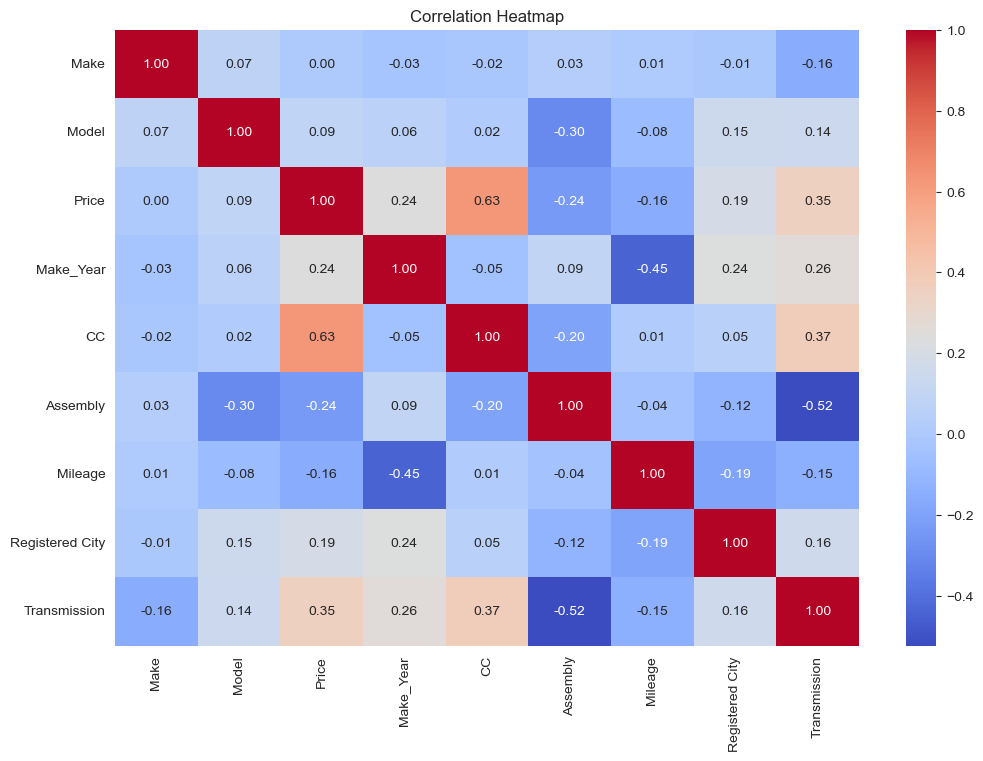

In [50]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [51]:
# Save the updated DataFrame to a new CSV file
df.to_csv('Preprocessed_Data.csv', index=False)

## **Model**

# **Linear Rgression Model**

In [52]:
# Prepare the data
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = Linear_model.predict(X_test)

# Calculate evaluation metrics
mae_linear = mean_absolute_error(y_test, predictions)
mse_linear = mean_squared_error(y_test, predictions)
# Calculate RMSE
rmse_linear = mean_squared_error(y_test, predictions, squared=False)
r2_linear = r2_score(y_test, predictions)

# Save the Linear Regression model as a Pickle file
linear_model_filename = 'linear_model.pkl'
joblib.dump(Linear_model, linear_model_filename)
print(f"Linear Regression model saved as Pickle file to {linear_model_filename}")



Linear Regression model saved as Pickle file to linear_model.pkl


/Users/Dekll/miniforge3/envs/mlwork/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluation

In [53]:
# Print the evaluation metrics
print("Mean Absolute Error (MAE) Of Linear Regression Model:" , mae_linear)
print("Mean Squared Error (MSE) Of Linear Regression Model:",   mse_linear)
print("Root Mean Squared Error (RMSE)Linear Regression Model:", rmse_linear)
print("R-squared (R^2):Linear Regression Model", r2_linear)

Mean Absolute Error (MAE) Of Linear Regression Model: 1079081.490030831
Mean Squared Error (MSE) Of Linear Regression Model: 6921918406117.846
Root Mean Squared Error (RMSE)Linear Regression Model: 2630953.896615797
R-squared (R^2):Linear Regression Model 0.49920835546792697


Results

In [54]:
linear_Actual = y_test[:10]
Predicted_Actual= predictions[:10]
#Datafram of results (first 10 rows)
first_10_results = pd.DataFrame({'Actual': linear_Actual, 'Predicted': Predicted_Actual.astype(int)})

# Print the DataFrame
print(first_10_results)


        Actual  Predicted
80268  9200000    8415203
79446  2250000    1820697
64657  2450000    2531194
60803   580000    2142857
1811    860000    1436937
5324   1525000    1024261
15562  4425000    5937737
27636  1380000    1679545
21272  1695000    1595142
27925  1975000    2089175


# Applying gridsearch CV

In [55]:
# Prepare the data
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train_Grid, X_test_Grid, y_train_Grid, y_test_Grid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge Regression model
model = Ridge()

# Define the parameter grid
param_grid = {'alpha': [0.925, 0.35, 1.75, 3.2, 90, 80]}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train_Grid, y_train_Grid)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
predictions_Grid= best_model.predict(X_test)

# Calculate evaluation metrics
mae_GridSearch = mean_absolute_error(y_test_Grid, predictions_Grid)
mse_GridSearch = mean_squared_error(y_test_Grid, predictions_Grid)
rmse_GridSearch = mean_squared_error(y_test, predictions_Grid, squared=False)
r2_GridSearch = r2_score(y_test_Grid, predictions_Grid)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae_GridSearch)
print("Mean Squared Error (MSE):", mse_GridSearch)
print("Root Mean Squared Error (RMSE):", rmse_GridSearch)
print("R-squared (R^2):", r2_GridSearch)


Best parameters: {'alpha': 1.75}
Mean Absolute Error (MAE): 1079071.1891760419
Mean Squared Error (MSE): 6921965007296.571
Root Mean Squared Error (RMSE): 2630962.752928397
R-squared (R^2): 0.49920498393426227


/Users/Dekll/miniforge3/envs/mlwork/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# **Neural Regression Model**

Tunned

In [56]:
# Split the data into training and testing sets for Neural Network
X_train_Neural, X_test_Neural, y_train_Neural, y_test_Neural = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the input features
scaler = StandardScaler()
X_train_Neural = scaler.fit_transform(X_train_Neural)
X_test_Neural = scaler.transform(X_test_Neural)

#Tuning Neural Network
def create_custom_nn(num_layers, num_neurons, input_dim):
    model = keras.Sequential()

    # Input layer
    model.add(keras.layers.Input(shape=(input_dim,)))

    # Hidden layers
    for _ in range(num_layers):
        model.add(keras.layers.Dense(num_neurons, activation='relu'))

    # Output layer (single neuron for regression)
    model.add(keras.layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# Create a neural network with 3 hidden layers, each having 64 neurons
custom_model = create_custom_nn(num_layers=3, num_neurons=64, input_dim=X_train_Neural.shape[1])

# Train the model
custom_model.fit(X_train_Neural, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss_neural = custom_model.evaluate(X_test_Neural, y_test)
print(f"Test Loss (MSE): {loss_neural:.4f}")

# Make predictions on the test set
predictions_neural = custom_model.predict(X_test_Neural)

# Calculate and print the R-squared (R^2) score
r2_neural = r2_score(y_test, predictions_neural)
print(f"R-squared (R^2) Score: {r2_neural:.4f}")

# Save the model as a Pickle file
neural_network_model = 'neural_network_model_tunned.pkl'
joblib.dump(custom_model, neural_network_model)
print(f"Model saved as Pickle file to {neural_network_model}")


Epoch 1/50
1612/1612 [==============================] - 1s 677us/step - loss: 13492965867520.0000 - val_loss: 7273407053824.0000
Epoch 2/50
1612/1612 [==============================] - 1s 649us/step - loss: 6880126566400.0000 - val_loss: 5899169038336.0000
Epoch 3/50
1612/1612 [==============================] - 1s 656us/step - loss: 6098839928832.0000 - val_loss: 5528758517760.0000
Epoch 4/50
1612/1612 [==============================] - 1s 635us/step - loss: 5876442726400.0000 - val_loss: 5375763415040.0000
Epoch 5/50
1612/1612 [==============================] - 1s 795us/step - loss: 5756802301952.0000 - val_loss: 5269786460160.0000
Epoch 6/50
1612/1612 [==============================] - 1s 667us/step - loss: 5653448884224.0000 - val_loss: 5173558640640.0000
Epoch 7/50
1612/1612 [==============================] - 1s 704us/step - loss: 5572623597568.0000 - val_loss: 5083929509888.0000
Epoch 8/50
1612/1612 [==============================] - 1s 697us/step - loss: 5489722654720.0000 - val_

Evaluation

In [57]:
# Calculate Mean Squared Error (MSE)
mse_neural= mean_squared_error(y_test_Neural, predictions_neural,)
print(f"Mean Squared Error (MSE): {mse_neural:.2f}")

# Print actual and predicted values along with R-squared (R^2) score
results_neural = pd.DataFrame({'Actual': y_test_Neural.iloc[0], 'Predicted': predictions_neural[0].astype(int)})
print("Actual vs. Predicted Values:")
print(results_neural)


Mean Squared Error (MSE): 4233259687786.31
Actual vs. Predicted Values:
    Actual  Predicted
0  9200000    8917856


Results

In [58]:
# Calculate Mean Squared Error (MSE)
mse_neural = mean_squared_error(y_test_Neural, predictions_neural)
print(f"Mean Squared Error (MSE): {mse_neural:.2f}")

# Select 10 random rows for actual and predicted values
random_indices = random.sample(range(len(y_test_Neural)), 10)
random_actual = y_test_Neural.iloc[random_indices].values
random_predicted = predictions_neural[random_indices].astype(int).flatten()

# Print actual and predicted values along with R-squared (R^2) score
results_neural = pd.DataFrame({'Actual': random_actual, 'Predicted': random_predicted})
print("Actual vs. Predicted Values (Random 10 Rows):")
print(results_neural)


Mean Squared Error (MSE): 4233259687786.31
Actual vs. Predicted Values (Random 10 Rows):
    Actual  Predicted
0  3750000    3684595
1  1470000    1614462
2  3979999    4095112
3  4100000    4243088
4  2700000    2938979
5  1560000    1441426
6  1060000    1283253
7  6300000    8955942
8   500000     616935
9  2250000    2208576


# **Comaprison of Models**

504/504 [==============================] - 0s 309us/step


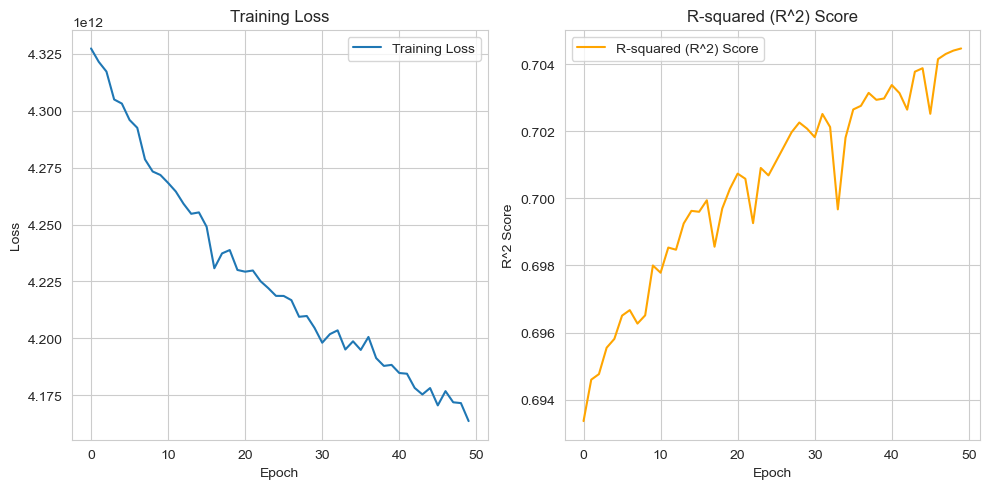

In [59]:
import joblib

# Load the trained model
custom_model = joblib.load('neural_network_model_tunned.pkl')

# Split the data into training and testing sets for Neural Network
X_train_Neural, X_test_Neural, y_train_Neural, y_test_Neural = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_Neural = scaler.fit_transform(X_train_Neural)
X_test_Neural = scaler.transform(X_test_Neural)

# Initialize empty lists to record training loss and R-squared (R^2) score
training_loss = []
r2_score_history = []

# Record training history without retraining
for epoch in range(50):
    history = custom_model.fit(X_train_Neural, y_train_Neural, epochs=1, batch_size=32, validation_split=0.2, verbose=0)

    # Calculate R-squared (R^2) score for the current epoch
    y_pred = custom_model.predict(X_test_Neural)
    r2 = r2_score(y_test_Neural, y_pred)

    # Record training loss and R-squared (R^2) score
    training_loss.append(history.history['loss'][0])
    r2_score_history.append(r2)

# Plot training loss and R-squared (R^2) score
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(r2_score_history, label='R-squared (R^2) Score', color='orange')
plt.title('R-squared (R^2) Score')
plt.xlabel('Epoch')
plt.ylabel('R^2 Score')
plt.legend()

plt.tight_layout()
plt.show()


In [60]:

# Calculate the number of parameters used by the model
num_params = custom_model.count_params()
print(f"Number of Parameters in the Model: {num_params}")


Number of Parameters in the Model: 8961


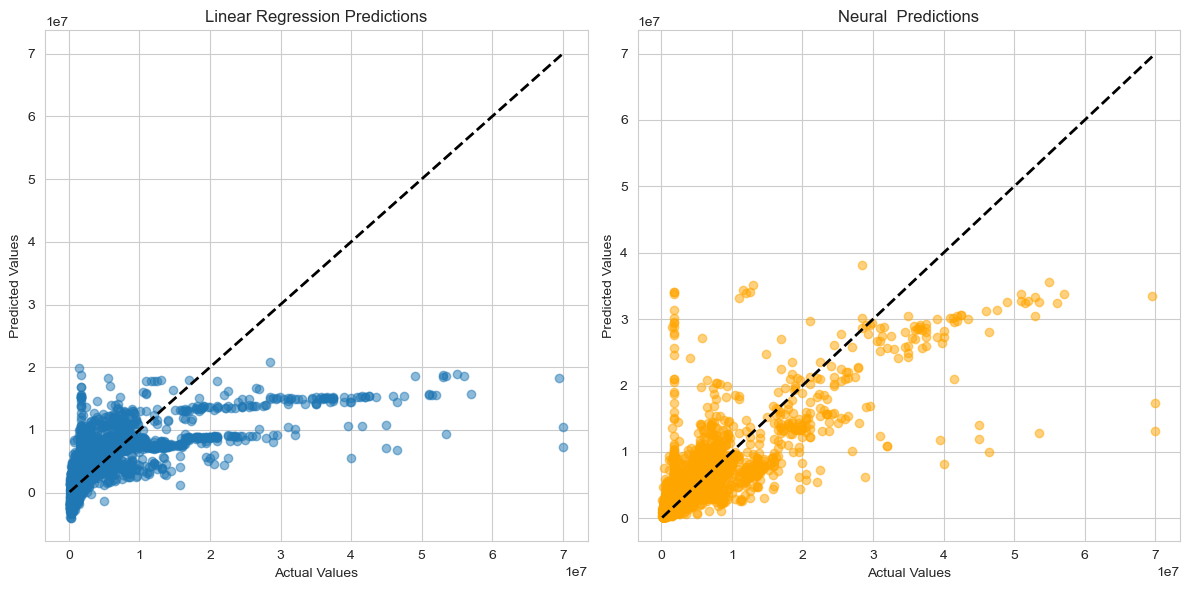

In [61]:
import matplotlib.pyplot as plt


# Creating the scatter plot
plt.figure(figsize=(12, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plot for Random Forest
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.scatter(y_test, predictions_neural, alpha=0.5, color='orange')
plt.plot([y_test_Neural.min(), y_test_Neural.max()], [y_test_Neural.min(), y_test_Neural.max()], 'k--', lw=2)  # Diagonal line
plt.title('Neural  Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.tight_layout()
plt.show()


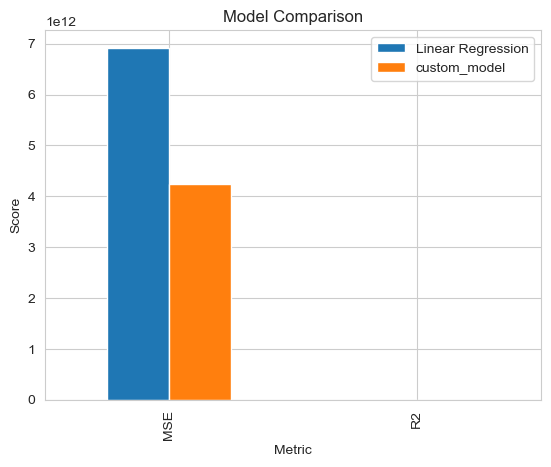

In [62]:
import matplotlib.pyplot as plt

# Example metrics for two models
model_performance = {
    'Metric': ['MSE', 'R2'],
    'Linear Regression': [mse_linear, r2_linear],
    'custom_model': [mse_neural, r2_neural]
}

df = pd.DataFrame(model_performance)

# Plotting
df.plot(x='Metric', y=['Linear Regression', 'custom_model'], kind='bar')
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()
